In [1]:
import INS_Analysis as insd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/home/jac2462@uta.edu/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [36]:
from scipy.ndimage import gaussian_filter

In [3]:
trials = '../../simulations/elemental_scan/gen/trials.csv'
trials = pd.read_csv(trials, index_col=0)
trials.head()

,6000,1001,14000,8016,name,filename,ptrac_filename
index,,,,,,,
0,-0.000100,-0.000100,-0.466600,-0.533200,concentration_C_0001_Si_4666,../compute/output/mctal/concentration_C_0001_S...,../compute/output/ptrac/concentration_C_0001_S...
1,-0.008667,-0.000300,-0.461600,-0.529433,concentration_C_008666666666666666_Si_4616,../compute/output/mctal/concentration_C_008666...,../compute/output/ptrac/concentration_C_008666...
2,-0.017233,-0.000500,-0.456600,-0.525667,concentration_C_017233333333333333_Si_4566,../compute/output/mctal/concentration_C_017233...,../compute/output/ptrac/concentration_C_017233...
3,-0.025800,-0.000700,-0.451600,-0.521900,concentration_C_0258_Si_4516,../compute/output/mctal/concentration_C_0258_S...,../compute/output/ptrac/concentration_C_0258_S...
4,-0.034933,-0.000967,-0.446267,-0.517833,concentration_C_03493333333333333_Si_446266666...,../compute/output/mctal/concentration_C_034933...,../compute/output/ptrac/concentration_C_034933...


In [8]:
spectrums = '../../simulations/elemental_scan/gen/spectrograms.npz'
spectrums = np.load(spectrums)
bins = spectrums['x']
spectrums = spectrums['y'][:, :, :]
trials['spectrogram'] = [s for s in spectrums]

In [9]:
trials['spectrogram'][0].shape

(151, 935)

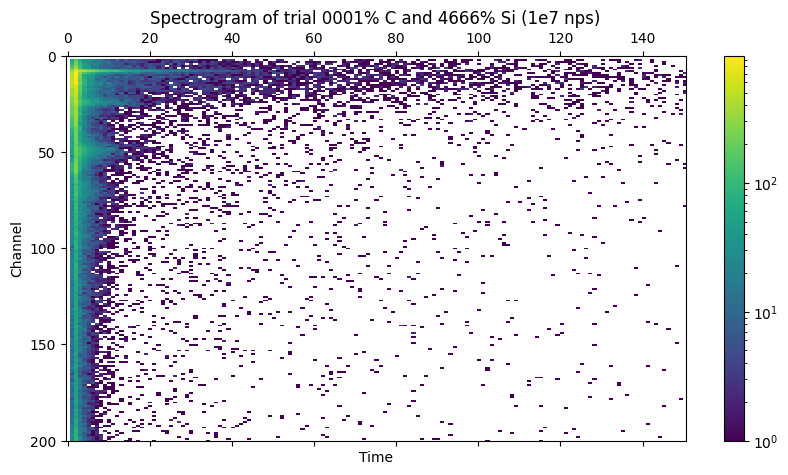

In [67]:
spec = np.transpose(trials['spectrogram'][0])

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
plt.title('Spectrogram of trial 0001% C and 4666% Si (1e7 nps)')
fig.colorbar(ax.matshow(spec, aspect='auto', norm = plt.cm.colors.LogNorm()))
plt.ylim(200, 0)
plt.ylabel('Channel')
plt.xlabel('Time (ns)')
plt.show()

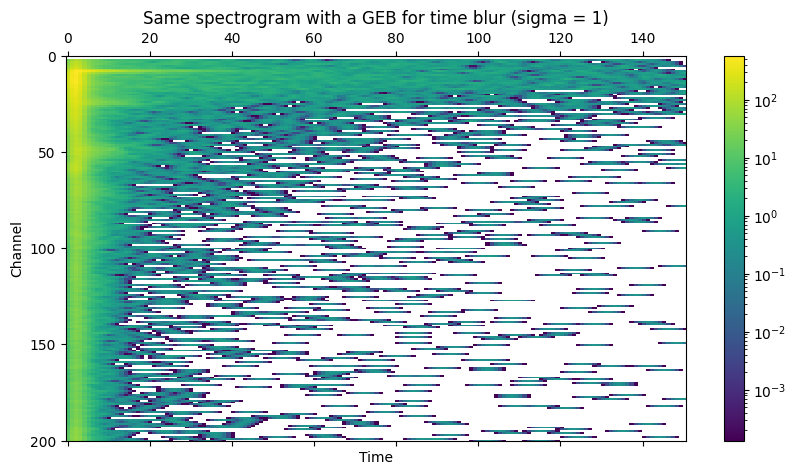

In [70]:
# spec = np.transpose(trials['spectrogram'][0])
spec = gaussian_filter(np.transpose(trials['spectrogram'][0]), sigma=(0, 1))
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
plt.title('Same spectrogram with a GEB for time blur (sigma = 1)')
fig.colorbar(ax.matshow(spec, aspect='auto', norm = plt.cm.colors.LogNorm()))
plt.ylim(200, 0)
plt.ylabel('Channel')
plt.xlabel('Time')
plt.show()